# Trabalho prático I - Aplicação de técnicas de agrupamento

Nesse trabalho aplicaremos técnicas de aprendizado não-supervisionado em dados do [Yelp](https://drive.google.com/file/d/1dYJFszSL_oSoBLRoZGZPBvgywVcvL1M0/view?usp=sharing) (Ver detalhes sobre o Yelp Challenge [aqui](https://www.yelp.com/dataset/challenge)).

O objetivo principal é encontrar distritos culinários na cidade de Las Vegas (Estados Unidos).
No contexto desse trabalho, distritos culinários são caracterizados por um conjunto de restaurantes que simultaneamente estão próximos (geograficamente) e são similares (com respeito à comida que servem).

O trabalho está dividido em duas partes. Em cada uma delas, vocês deverão utilizar uma parte diferente do conjunto de dados. Mais detalhes, nas seções a seguir.

Além disso, vocês deverão utilizar _Python_ e _Jupyter Notebooks_, de forma que todos os resultados estarão em um _notebook_ (este aqui que vocês estão lendo). Vocês estarão livres para escolher as bibliotecas que preferirem.

Sobre o trabalho:

**Grupo:** de até 3 pessoas. Mantenha em mente que 2 pessoas no mesmo grupo neste trabalho não poderão estar no mesmo grupo no trabalho 2. Pode haver repetição com relação aos grupos das listas.

**Data de entrega:** **23 de maio de 2018** (para ambas as partes) até às **18 horas**.

**Forma de entrega:** Vocês deverão enviar esse notebook (com código, resultados e discussões) para o e-mail do professor. É importante ressaltar que seu notebook tem que ser executável, i.e., resultados (gráficos, tabelas e números) devem ser gerados novamente ao executar o código do notebook a partir do conjunto de dados originais. **A Falha desse último ponto implicará em nota zero!**

**Versão do Python:** Python 2 ou Python 3. Apenas indiquem no início do trabalho qual foi escolhida.



## Parte I

No arquivo `yelp_academic_dataset_business.json` estão contidas informações sobre vários estabelecimentos comerciais do conjunto de dados do Yelp, incluindo várias cidades e tipos de estabelecimento que não temos interesse nesse trabalho. Em cada linha do arquivo há uma _string_ contendo um _json_ referente a cada estabelecimento.

Abaixo, uma exemplo de _json_. Veja que:
-  O atributo `city` identifica a cidade
-  O atributo `business_id` é um identificador único no conjunto de dados em todos os arquivos
-  Os atributos `latitude` e `longitude` estão disponíveis
-  O atributo `categories` caracteriza o ramo de atividade. Todos os restaurantes têm a categoria 'Restaurants' nesse atributo. Além disso, o tipo de culinária de cada restaurante é descrito nesse atributo.

In [1]:
import json
line = '{"city": "Las Vegas", "neighborhood": "Southeast", "name": "Flight Deck Bar & Grill", "business_id": "Pd52CjgyEU3Rb8co6QfTPw", "longitude": -115.1708484, "hours": {"Monday": "8:30-22:30", "Tuesday": "8:30-22:30", "Friday": "8:30-22:30", "Wednesday": "8:30-22:30", "Thursday": "8:30-22:30", "Sunday": "8:30-22:30", "Saturday": "8:30-22:30"}, "state": "NV", "postal_code": "89119", "categories": ["Nightlife", "Bars", "Barbeque", "Sports Bars", "American (New)", "Restaurants"], "stars": 4.0, "address": "6730 S Las Vegas Blvd", "latitude": 36.0669136, "review_count": 13, "attributes": {"Alcohol": "full_bar", "HasTV": true, "NoiseLevel": "average", "RestaurantsAttire": "casual", "BusinessAcceptsCreditCards": true, "Music": {"dj": false, "background_music": true, "no_music": false, "jukebox": false, "live": false, "video": false, "karaoke": false}, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false, "casual": true}, "RestaurantsGoodForGroups": true, "Caters": true, "WiFi": "free", "RestaurantsReservations": false, "BikeParking": true, "RestaurantsTakeOut": true, "GoodForKids": true, "HappyHour": true, "GoodForDancing": false, "RestaurantsTableService": true, "OutdoorSeating": false, "RestaurantsPriceRange2": 2, "RestaurantsDelivery": false, "BestNights": {"monday": false, "tuesday": false, "friday": false, "wednesday": true, "thursday": false, "sunday": false, "saturday": false}, "GoodForMeal": {"dessert": false, "latenight": false, "lunch": true, "dinner": false, "brunch": false, "breakfast": false}, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "CoatCheck": false, "Smoking": "no", "WheelchairAccessible": true}, "is_open": 1}'
print(json.dumps(json.loads(line), indent = 3))

{
   "city": "Las Vegas", 
   "neighborhood": "Southeast", 
   "name": "Flight Deck Bar & Grill", 
   "business_id": "Pd52CjgyEU3Rb8co6QfTPw", 
   "longitude": -115.1708484, 
   "hours": {
      "Monday": "8:30-22:30", 
      "Tuesday": "8:30-22:30", 
      "Friday": "8:30-22:30", 
      "Wednesday": "8:30-22:30", 
      "Thursday": "8:30-22:30", 
      "Sunday": "8:30-22:30", 
      "Saturday": "8:30-22:30"
   }, 
   "is_open": 1, 
   "state": "NV", 
   "postal_code": "89119", 
   "stars": 4.0, 
   "address": "6730 S Las Vegas Blvd", 
   "latitude": 36.0669136, 
   "review_count": 13, 
   "attributes": {
      "Alcohol": "full_bar", 
      "HasTV": true, 
      "NoiseLevel": "average", 
      "RestaurantsAttire": "casual", 
      "BusinessAcceptsCreditCards": true, 
      "Music": {
         "dj": false, 
         "background_music": true, 
         "no_music": false, 
         "karaoke": false, 
         "live": false, 
         "video": false, 
         "jukebox": false
      }, 
  

A partir dos dados descritos, você deve encontrar distritos culinários em Las Vegas. Encontre grupos considerando que a similaridade entre restaurantes pode ser inferida pelo atributo `categories` e a proximidade através dos atributos `latitude` e `longitude`.

**a)** Proponha uma representação apropriada para os dados. Justifique sua escolha

**b)** Utilize técnicas de agrupamento para encontrar distritos culinários. É obrigatório o uso de pelo menos quatro técnicas:
-  k-means
-  Agrupamento hierárquico
-  GMM (Gaussian Mixture Model)
-  Agrupamento Espectral

**Sugestão:** Todas já estão implementadas na biblioteca _sklearn_

**c)** Apresente uma justificativa plausível para o número de grupos utilzado no item anterior

**d)** Apresente o `dendrograma` para o resultado do agrupamento hierárquico

**e)** Baseado no conteúdo de cada grupo, proponha uma forma sistemática de encontrar _rótulos_ para cada grupo. Veja que se dois grupos forem identificado pelo mesmo rótulo há um problema (com o resultado de seu agrupamento ou com sua forma de rotular grupos)

**f)** Faça um gráfico para cada agrupamento obtido da seguinte forma:
-  cada restaurante será um ponto no plano de acordo com suas coordenadas geográficas
-  a cor de cada ponto será diferente para grupos diferentes
-  cada grupo deve ser identificado com seu respectivo rótulo encontrado no item anterior (e.g., através de uma legenda de cor)

**g)** Comente os resultados. Comente também as diferenças de cada agrupamento

**Observação:** sua criatividade para gerar visualizações informativas e de qualidade será parte da avaliação.


## Resolução da parte I

### Inclusões de biblioteca

In [1]:
import json
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (25, 16)
plt.rcParams['font.size'] = 24.0

### Leitura e representação dos dados

A leitura dos dados foi feita da maneira em que, na nossa opinião, daria mais legibilidade ao código.  
  
Os dados estão sendo representados por uma matriz onde:
* **Colunas**: Todas as categorias existentes (exceto "Restaurants"), onde cada categoria é um atributo binário, onde 1 indica que o restaurante pertence à categoria e 0 caso contrário, e dois valores ponto flutuante, que são a latitude e longitude
* **Linhas**: Cada restaurante de Las Vegas existente na base de dados
  
Escolhemos utilizar o DataFrame do pandas, e exportamos os dados já montados para o arquivo "/data/data_pt1.csv", o qual iremos utilizar para os outros itens da primeira parte.

In [2]:
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r")

data = []
attributes = ['latitude', 'longitude']
data_dict = {}

for line in input_file:
    restaurant = json.loads(line)
    if "Restaurants" in restaurant["categories"] and restaurant["city"] == "Las Vegas":
        data.append(restaurant)
        
input_file.close()

count_categories = {}

for restaurant in data:
    for category in restaurant["categories"]:
        if not(category in attributes) and category != "Restaurants":
            attributes.append(category)
            count_categories[category] = 1
        elif category != "Restaurants":
            count_categories[category] += 1

for attr in attributes:
    data_dict[attr] = []
    for restaurant in data:
        if attr == "latitude" or attr == "longitude":
            data_dict[attr].append(restaurant[attr])
        elif attr != "Restaurants" and attr in restaurant["categories"]:
            data_dict[attr].append(1)
        else:
            data_dict[attr].append(0)
            
df = pd.DataFrame(data_dict)
df.to_csv("data/data_pt1.csv", index=False)

data = pd.read_csv("data/data_pt1.csv")
data.info(verbose=False, memory_usage=False)

for column in data:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 163 entries, Active Life to longitude
dtypes: float64(2), int64(161)

### PCA (Principal Components Analysis)

Na base de dados, existem 163 atributos. Utilizaremos PCA para comparar (**ESCREVER JUSTIFICATIVA PCA**)

In [19]:
centralized_data = data - data.mean()
pca = PCA(n_components=len(df.columns))
data_pca = pca.fit_transform(centralized_data)

df_pca = pd.DataFrame(data_pca)

df_pca = df_pca.drop([column for column in range(47, len(df_pca.columns))], axis=1)
    
'''
with plt.style.context('seaborn-whitegrid'):
    plt.rcParams["figure.figsize"] = (40, 25)
    plt.rcParams['font.size'] = 20.0

    plt.bar(range(1, len(df.columns) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')

    variance = pca.explained_variance_ratio_
    for i, j in enumerate(variance):
        variance[i] = sum(variance[i - 1:i + 1]) if i > 0 else variance[i]

    plt.step(range(1, len(df.columns) + 1), variance, where='mid', label='cumulative explained variance')

    plt.xticks(range(1, len(df.columns)))
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.title('Variance explained with PCA')
    plt.tight_layout()

variance[47]
'''

'\nwith plt.style.context(\'seaborn-whitegrid\'):\n    plt.rcParams["figure.figsize"] = (40, 25)\n    plt.rcParams[\'font.size\'] = 20.0\n\n    plt.bar(range(1, len(df.columns) + 1), pca.explained_variance_ratio_, alpha=0.5, align=\'center\', label=\'individual explained variance\')\n\n    variance = pca.explained_variance_ratio_\n    for i, j in enumerate(variance):\n        variance[i] = sum(variance[i - 1:i + 1]) if i > 0 else variance[i]\n\n    plt.step(range(1, len(df.columns) + 1), variance, where=\'mid\', label=\'cumulative explained variance\')\n\n    plt.xticks(range(1, len(df.columns)))\n    plt.ylabel(\'Explained variance ratio\')\n    plt.xlabel(\'Principal components\')\n    plt.legend(loc=\'best\')\n    plt.title(\'Variance explained with PCA\')\n    plt.tight_layout()\n\nvariance[47]\n'

## Escolha dos possíveis valores de $k$ com inércia

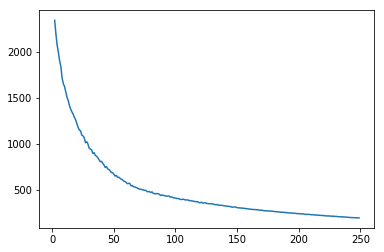

In [21]:
inertia = []

# Normalização dos dados
for column in df_pca:
    df_pca[column] = (df_pca[column] - df_pca[column].min()) / (df_pca[column].max() - df_pca[column].min())
    
for k in range(2, 250):
    km = KMeans(n_clusters=k, n_jobs=-1)
    labels = km.fit_predict(df_pca)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 250), inertia)

## Aplicação dos algoritmos de agrupamento para $k$ com valores entre 26 a 35

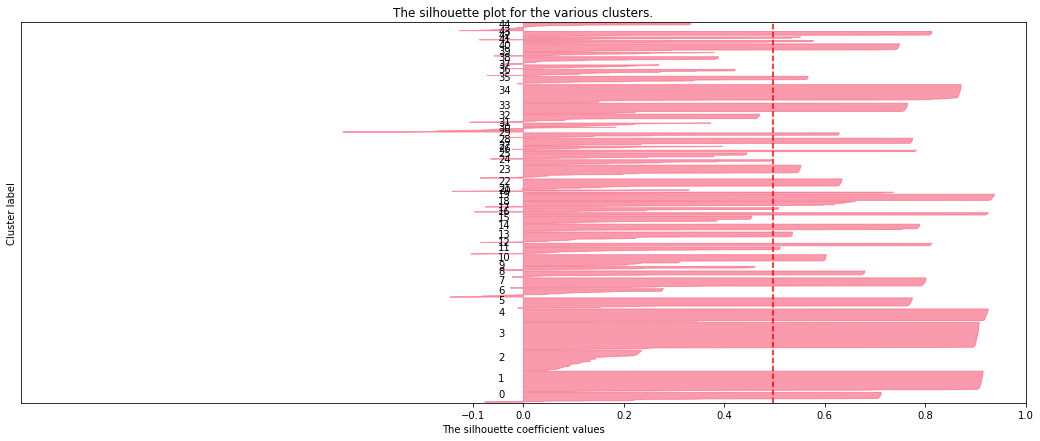

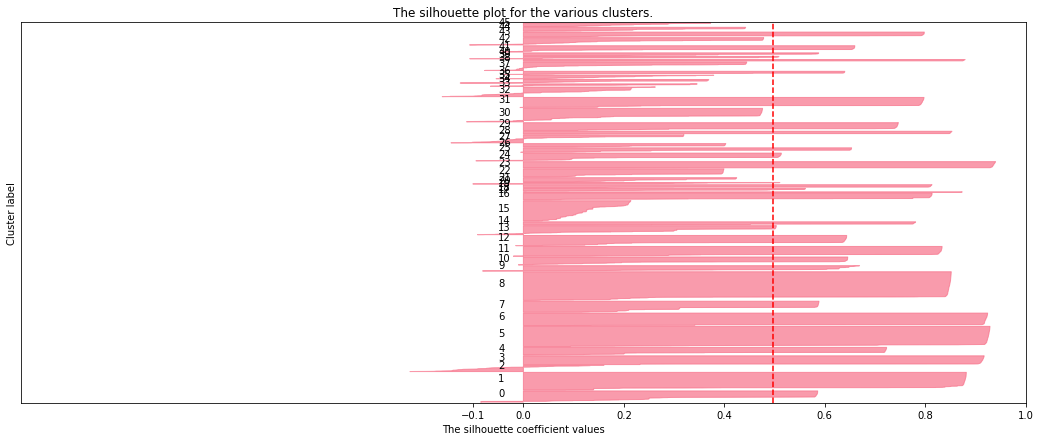

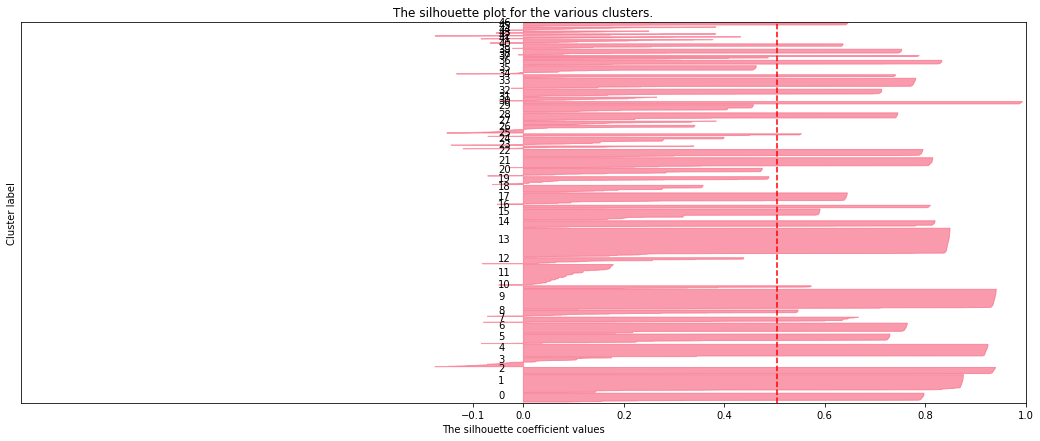

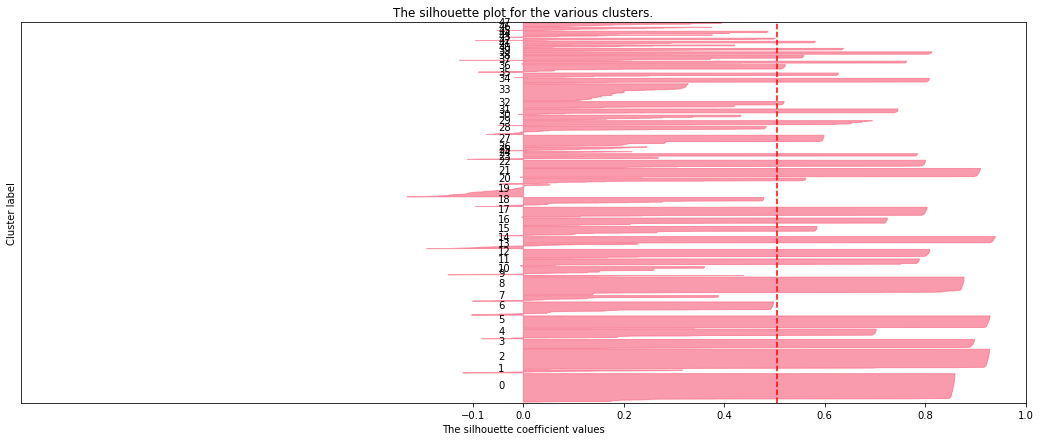

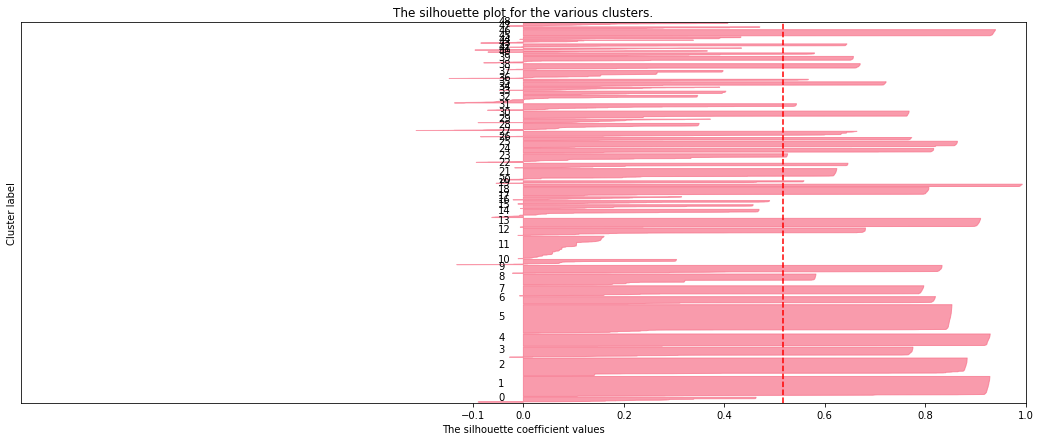

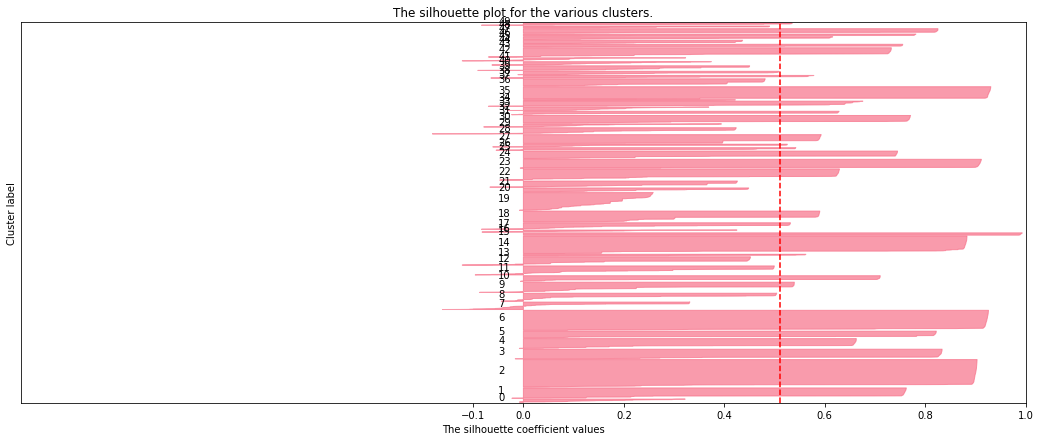

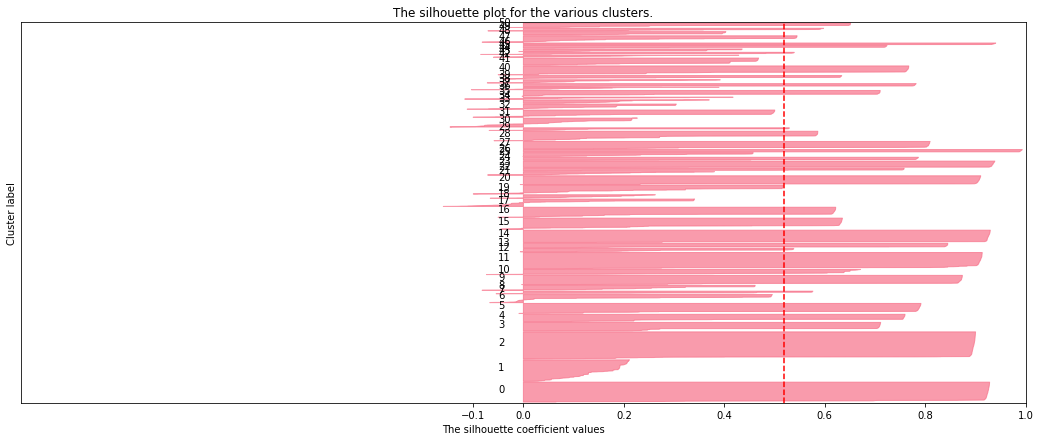

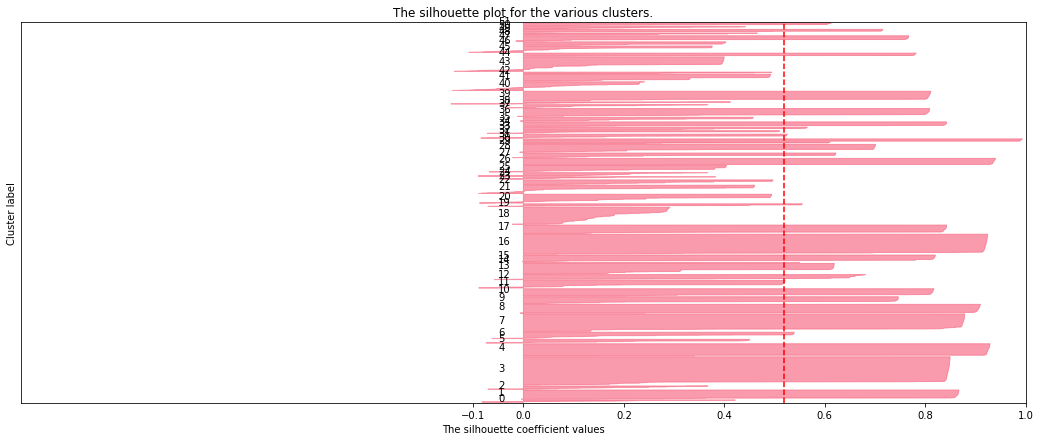

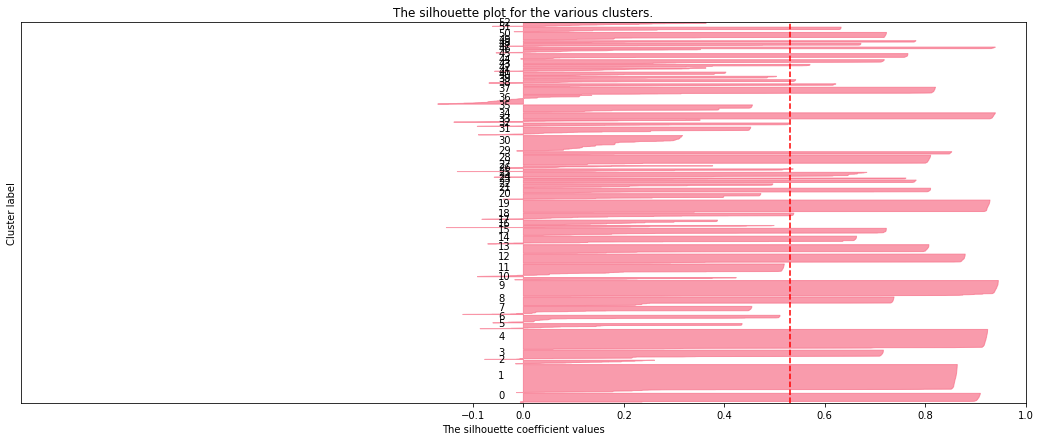

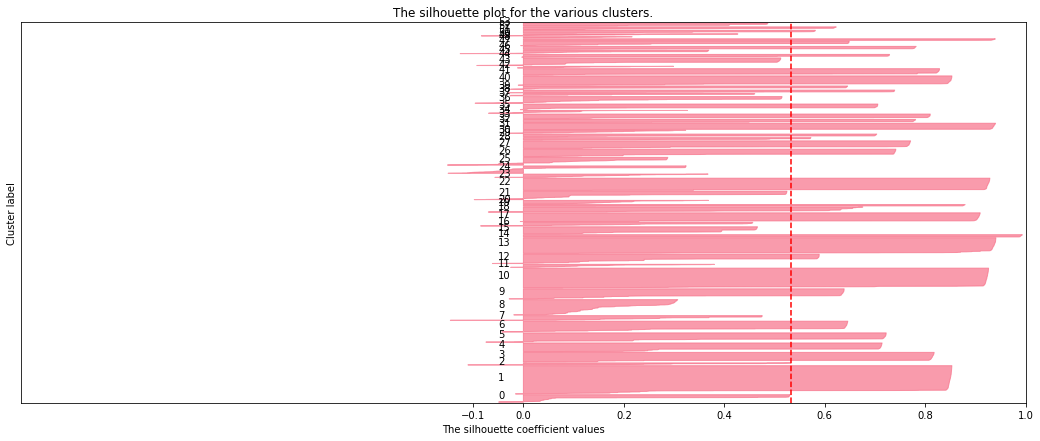

In [31]:
range_n_clusters = [x for x in range(45, 55)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = (sns.color_palette("husl", n_clusters))
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

## Parte II

O objetivo dessa parte é o mesmo da Parte I (de **(a)** a **(f)**). Mas agora, vocês não poderão utilizar o atributo `categories`. Vocês deverão "inferir as categorias" de cada restaurante a partir de seus respectivos _reviews_ no Yelp.
O arquivo `yelp_academic_dataset_review.json` contém uma coleção de _reviews_, novamente, cada linha (_review_) é um _json_, como o do exemplo abaixo.

Através do atributo `business_id` você pode identificar todos os _reviews_ 
de cada restaurante em Las Vegas. Além desse atributo, necessita-se apenas do atributo `text`, i.e., o conteúdo do _review_.




In [2]:
import json
line = '{"funny": 0, "user_id": "bv2nCi5Qv5vroFiqKGopiw", "review_id": "n6QzIUObkYshz4dz2QRJTw", "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \\n\\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \\n\\nA bit outside of downtown montreal but take the metro out and it\'s less than a 10 minute walk from the station.", "business_id": "VR6GpWIda3SfvPC-lg9H3w", "stars": 5, "date": "2016-05-28", "useful": 0, "cool": 0}'
print(json.dumps(json.loads(line), indent = 3))

{
   "funny": 0,
   "user_id": "bv2nCi5Qv5vroFiqKGopiw",
   "review_id": "n6QzIUObkYshz4dz2QRJTw",
   "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.",
   "business_id": "VR6GpWIda3SfvPC-lg9H3w",
   "stars": 5,
   "date": "2016-05-28",
   "useful": 0,
   "cool": 0
}


# Parte 2 - Letra A

## Leitura dos arquivos business e reviews 

É feita a criação de um novo arquivo csv data_pt2 onde cada business_id tem todas suas reviews e coordenadas associadas a ele

In [7]:
# leitura dos dados da primeira parte para obter as coordenadas
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r")

ids = {}
ids["business_id"] = []
ids["latitude"] = []
ids["longitude"] = []
attributes = ['latitude', 'longitude']
data_p2_dict = {}

for line in input_file:
    restaurant = json.loads(line)
    if "Restaurants" in restaurant["categories"] and restaurant["city"] == "Las Vegas":
        ids["business_id"].append(restaurant["business_id"])
        ids["latitude"].append(restaurant["latitude"])
        ids["longitude"].append(restaurant["longitude"])
        
input_file.close();

#leitura dos dados do arquivo review para associar cada restaurante com suas respectivas avaliações
input_file = open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json", "r")

data_p2_dict["business_id"] = []
data_p2_dict["text"] = []
data_p2_dict["latitude"] = []
data_p2_dict["longitude"] = []

for line in input_file:
    restaurant = json.loads(line)
    if (restaurant["business_id"] in ids["business_id"]):
        index = ids["business_id"].index(restaurant["business_id"])
        if(restaurant["business_id"] in data_p2_dict["business_id"]):
            index_dict = data_p2_dict["business_id"].index(restaurant["business_id"])
            data_p2_dict["text"][index_dict].append(restaurant["text"])
        else:
            data_p2_dict["business_id"].append(restaurant["business_id"])
            data_p2_dict["text"].append([restaurant["text"]])
            data_p2_dict["latitude"].append(ids["latitude"][index])
            data_p2_dict["longitude"].append(ids["longitude"][index])
        
input_file.close()

#escrita dos dados em um arquivo csv
df_p2 = pd.DataFrame(data_p2_dict)
df_p2.to_csv("data/data_pt2.csv", index=False)

# data_p2 = pd.read_csv("data/data_pt2.csv")
df_p2.info(verbose=False, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 4 entries, business_id to text
dtypes: float64(2), object(2)

## Cálculo do TF-IDF

É feito o cálculo do TF-IDF de cada business_id em relação às suas reviews. Para cada termo encontrado, o TfidfVectorizer retorna uma matriz 1xN, onde N é a quantidade de reviews que o business_id em questão tem. Como precisamos de um único valor para cada termo, é feita uma média aritmética com os valores dessa matriz.
Depois disso, é feita uma matriz contendo os scores TF-IDF de cada business_id para cada um dos termos encontrados que é salva no arquivo csv data_pt2_names. 

In [8]:
#lista que relaciona cada restaurante com os termos principais de suas avaliacoes
terms_list = []
#conjunto contendo todos os termos principais obtidos através do TF-IDF
feature_names = set()

#criação da matriz de tf-idf
for reviews in df_p2["text"]:    
    vectorizer = TfidfVectorizer(min_df=0.2, norm = "l2", use_idf = "true", stop_words="english")
    tfidf = vectorizer.fit_transform(reviews)
    feature_names.update(vectorizer.get_feature_names())
    idf = vectorizer.idf_
    #lista onde serão atribuídas as médias dos tf-idf de cada termo encontrado pelo tf-idf para o restaurante em questão
    scores = []
    for i in range(0,tfidf.shape[1]):
        scores.append((sum(tfidf[:,i].toarray())/len(tfidf[:,i].toarray()))[0])
    terms_list.append(dict(zip(vectorizer.get_feature_names(), scores)))
    
feature_names = list(feature_names)
feature_names.sort()

#obtenção e normalização dos dados das coordenadas de cada restaurante
latitudes = df_p2["latitude"]
longitudes = df_p2["longitude"]

for column in latitudes:
    latitudes = (latitudes - latitudes.min()) / (latitudes.max() - latitudes.min())
    
for column in longitudes:
    longitudes = (longitudes - longitudes.min()) / (longitudes.max() - longitudes.min())

#estrutura contendo a pontuação de cada termo principal para cada restaurante. Quando um termo não possui 
#valor atríbuido para um determinado restaurante, é atribuído valor nulo a ele
content = {}
for name in feature_names:
    content[name] = []
    for item in terms_list:
        if name in item:
            content[name].append(item[name])
        else:
            content[name].append(0)

#conversão da estrutura dos nomes para dataframe e escrita em um arquivo csv
data_names = pd.DataFrame(content)
data_names.info(verbose=False, memory_usage=False)
data_names.to_csv("data/data_pt2_names.csv", index=False)

#conversão da estrutura das coordenadas normalizadas para dataframe e escrita em um arquivo csv
coordinates = pd.DataFrame()
coordinates["latitude"] = latitudes
coordinates["longitude"] = longitudes
coordinates.to_csv("data/data_pt2_coordinates.csv", index=False)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Columns: 12864 entries, 00 to 焼きたてのガーリックブレッドは大変美味しかったです
dtypes: float64(12864)

### Cálculo do PCA sobre a matriz de TF-IDF

Como foram encontrados mais de 13 mil termos, é feito um PCA para reduzir a dimensionalidade da matriz

In [26]:
#leitura dos dados obtidos para que não seja necessária a execução do trecho anterior
data_names = pd.read_csv("data/data_pt2_names.csv")

#centralização dos dados
centralized_data_names = data_names - data_names.mean()
pca = PCA(n_components=len(feature_names))
data_names_pca = pca.fit_transform(centralized_data_names)
#criação de uma estrutura contendo a variância explicada
names_variance = pca.explained_variance_ratio_ 

#conversão da estrutura dos nomes após aplicação do PCA para dataframe e escrita em um arquivo csv
df_pca_names = pd.DataFrame(data_names_pca)
df_pca_names.to_csv("data/data_pt2_names_pca.csv", index=False)


## Calculando número de componentes para capturar a porcentagem desejada da variância

In [27]:
soma = 0
j = 0
per_variancia = 0.9
for i in range(0,len(names_variance)):
    soma = soma + names_variance[i]
    if(soma >= per_variancia):
        j = i
        break
print('Número de dimensões necessárias para capturar ', str(per_variancia*100), '% da variância: ', str(j))

Número de dimensões necessárias para capturar  90.0 % da variância:  632


In [28]:
#leitura de todos os dados obtidos anteriormente para que não seja necessária sua execução
df_pca_names = pd.read_csv("data/data_pt2_names_pca.csv")
df_pca_names.drop(df_pca_names.columns[632:],axis = 1, inplace = True)

coordinates = pd.read_csv("data/data_pt2_coordinates.csv")
df_pca_names["latitude"] = coordinates["latitude"]
df_pca_names["longitude"] = coordinates["longitude"]

# Parte 2 - Letra B

## Função de agrupamento

Para simplificar o código, estamos utilizando a função de agrupamento e plotagem de gráficos `silhouette_analysis` definida na primeira parte, porém com algumas mudanças na parte de rotulamento de grupos

In [95]:
#leitura da matriz de restaurante x termos principais com acréscimo das colunas de latitude e longitude
data = pd.read_csv("data/data_pt2_names.csv")

coordinates = pd.read_csv("data/data_pt2_coordinates.csv")
data["latitude"] = coordinates["latitude"]
data["longitude"] = coordinates["longitude"]

#estrutura contendo o rotulamento
all_categories = {}

# def plot_dendrogram(model, **kwargs):

#     # Children of hierarchical clustering
#     children = model.children_

#     # Distances between each pair of children
#     # Since we don't have this information, we can use a uniform one for plotting
#     distance = np.arange(children.shape[0])

#     # The number of observations contained in each cluster level
#     no_of_observations = np.arange(2, children.shape[0]+2)

#     # Create linkage matrix and then plot the dendrogram
#     linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs, truncate_mode='level', p=50)

def silhouette_analysis(data_analysis, n_clusters, method="k-means"):
    #agrupamento
    if method == "k-means":
        clusterer = KMeans(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "agrupamento hiérarquico":
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(data_analysis)
    elif method == "GMM":
        clusterer = GaussianMixture(n_components=n_clusters).fit(data_analysis)
        cluster_labels = clusterer.predict(data_analysis)
    else:
        clusterer = SpectralClustering(n_clusters=n_clusters, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(data_analysis)
    
    #pega a matriz de restaurante x termos principais e, para cada restaurante, acrescenta um campo indicando a qual grupo
    #ele pertence
    data_with_labels = data.copy()
    data_with_labels.insert(len(data_with_labels.columns), "cluster_label", cluster_labels)

    #realiza o rotulamento. Para um grupo G encontrado, fazemos seu rotulamento com base nos 20 termos que têm maior pontuação
    #dentro de G e que têm menor pontuação para os restaurantes fora de G, para isso pegamos a pontuação total de um termo,
    #obtemos a média aritmética dos restaurantes de G e a média aritmética dos que estão fora de G, subtraímos a primeira pela
    #segunda e pegamos os termos com maior resultado dessa subtração
    all_categories[method] = {}
    for i in range(n_clusters):
        all_categories[method][i] = []
        data_in_label = data_with_labels[data_with_labels.cluster_label == i]
        data_in_cluster = data_in_label.drop(
            ["latitude", "longitude", "cluster_label"], axis=1)
        data_out_label = data_with_labels[data_with_labels.cluster_label != i]
        data_out_cluster = data_out_label.drop(
            ["latitude", "longitude", "cluster_label"], axis=1)
        data_cluster = data_in_cluster.mean() - 1.15*data_out_cluster.mean()    
        all_categories[method][i].append(
            data_cluster.sort_values(ascending=False)[1:20])
        
        print ("Cluster ", str(i))
        for word, value in data_cluster.sort_values(ascending=False)[1:20].iteritems():
            j = 0
            for restaurant in data_in_cluster[word]:
                if (restaurant != 0) : 
                    j += 1
            print ("   Palavra ", word, " Percentual ", str(j/data_in_cluster.shape[0]))

            
    #plotagem dos gráficos
    
    if(method == "agrupamento hiérarquico"):
        plt.rcParams["figure.figsize"] = (8,8)
        Z = linkage(data_analysis, 'ward')
        
        R = dendrogram(Z, truncate_mode='lastp', p=n_clusters, no_plot=True, labels = cluster_labels)
        
        
        labels = list(set(cluster_labels))
        temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
        def llf(xx):
            return temp[xx]

        dendrogram(Z, truncate_mode='lastp', p=n_clusters, show_contracted = True, leaf_label_func =llf, labels = cluster_labels)
        
        print(Counter(cluster_labels))
        
        plt.title('Dendograma Reduzido do Agrupamento Hierárquico')
        plt.xlabel('Tamanho do grupo')
        plt.ylabel('Distância')
        plt.axhline(y = 0.8)
        plt.show()
    
    sns.set()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_analysis) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(data_analysis, cluster_labels)
    print("Para n_clusters = ", n_clusters,
          ", o silhouette_score médio é:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(
        data_analysis, cluster_labels)

    y_lower = 10

    colors_vec = ["#e6194b", "#3cb44b", "#ffe119", "#0082c8",
                  "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#fabebe", "#008080",
                  "#e6beff", "#800000", "#000080", "#000000", "#d2f53c", "#808080"]

    color = sns.color_palette(colors_vec)
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color[i], edgecolor=color[i], alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("A distribuição do coeficiente de silhueta por cluster.")
    ax1.set_xlabel("Valor do coeficiente de silhueta")
    ax1.set_ylabel("Rótulos do cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = [color[i] for i in cluster_labels]
    ax2.scatter(data["latitude"].as_matrix(), data["longitude"].as_matrix(),
                marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("A visualização dos dados clusterizados")
    ax2.set_xlabel("Latitude")
    ax2.set_ylabel("Longitude")

    plt.suptitle(("Análise da silhueta utilizando o " + method + " com n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


## Kmeans - 10 grupos

Cluster  0
   Palavra  drive  Percentual  0.23076923076923078
   Palavra  tacos  Percentual  0.14358974358974358
   Palavra  said  Percentual  0.18974358974358974
   Palavra  taco  Percentual  0.1282051282051282
   Palavra  mexican  Percentual  0.15384615384615385
   Palavra  minutes  Percentual  0.14871794871794872
   Palavra  customer  Percentual  0.1282051282051282
   Palavra  usually  Percentual  0.1076923076923077
   Palavra  didn  Percentual  0.22564102564102564
   Palavra  fast  Percentual  0.19487179487179487
   Palavra  awesome  Percentual  0.1076923076923077
   Palavra  clean  Percentual  0.1282051282051282
   Palavra  employees  Percentual  0.08205128205128205
   Palavra  tamales  Percentual  0.015384615384615385
   Palavra  don  Percentual  0.3435897435897436
   Palavra  decided  Percentual  0.09743589743589744
   Palavra  town  Percentual  0.08205128205128205
   Palavra  manager  Percentual  0.08205128205128205
   Palavra  nellis  Percentual  0.05641025641025641
Cluster  1

Cluster  9
   Palavra  location  Percentual  0.3155737704918033
   Palavra  pizza  Percentual  0.1721311475409836
   Palavra  fast  Percentual  0.1885245901639344
   Palavra  drive  Percentual  0.14754098360655737
   Palavra  customer  Percentual  0.12295081967213115
   Palavra  staff  Percentual  0.18032786885245902
   Palavra  minutes  Percentual  0.11065573770491803
   Palavra  clean  Percentual  0.10655737704918032
   Palavra  friendly  Percentual  0.26229508196721313
   Palavra  wings  Percentual  0.05327868852459016
   Palavra  crust  Percentual  0.05737704918032787
   Palavra  sandwiches  Percentual  0.08196721311475409
   Palavra  pizzas  Percentual  0.045081967213114756
   Palavra  home  Percentual  0.0860655737704918
   Palavra  wait  Percentual  0.11475409836065574
   Palavra  fe  Percentual  0.045081967213114756
   Palavra  bbq  Percentual  0.05737704918032787
   Palavra  ribs  Percentual  0.036885245901639344
   Palavra  garlic  Percentual  0.05327868852459016
Para n_clust

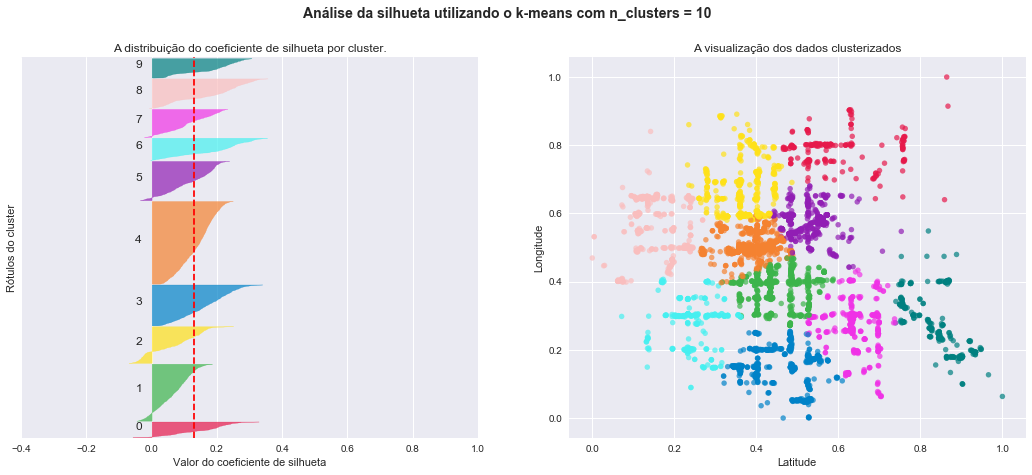

In [96]:
data_kmeans = df_pca_names.copy()
data_kmeans["latitude"] *= 2.6
data_kmeans["longitude"] *= 2.6
silhouette_analysis(data_kmeans, 10)

In [59]:
print(all_categories["k-means"])

{0: love         0.008742
location     0.007191
order        0.004547
pho          0.003937
drive        0.003499
friendly     0.003000
happy        0.002630
egg          0.002458
katsu        0.002161
teriyaki     0.002063
crust        0.002005
bar          0.001559
healthy      0.001555
bartender    0.001492
sushi        0.001466
try          0.001444
roberto      0.001421
ve           0.001396
pts          0.001340
dtype: float64}



## Agrupamento Hierárquico - 10 grupos

Counter({2: 961, 4: 817, 0: 609, 8: 563, 1: 396, 7: 353, 3: 335, 6: 292, 5: 201, 9: 131})


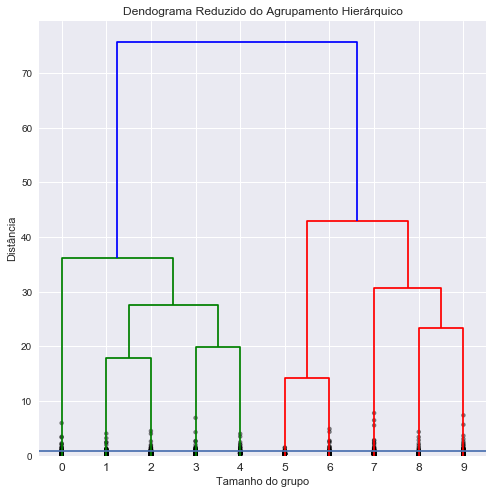

Para n_clusters =  10 , o silhouette_score médio é: 0.2823912102642325


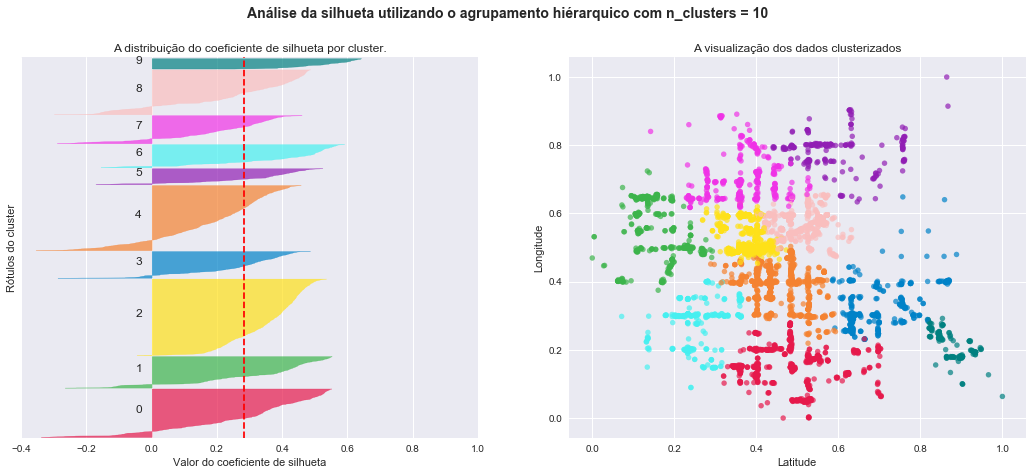

In [41]:
data_hierarchical = df_pca_names.copy()
data_hierarchical["latitude"] *= 5
data_hierarchical["longitude"] *= 5
silhouette_analysis(data_hierarchical, 10,"agrupamento hiérarquico")


## GMM - 12 grupos

[truck           0.002497
street          0.002002
fremont         0.001998
hotel           0.001386
mexican         0.001237
las             0.001233
recommend       0.001218
stratosphere    0.001134
old             0.001081
rib             0.001071
el              0.001009
amazing         0.000998
pupusas         0.000983
diner           0.000960
prime           0.000916
bbq             0.000865
plaza           0.000854
park            0.000825
closed          0.000816
dtype: float64, drive       0.001297
has         0.001276
asada       0.001220
every       0.001135
her         0.001048
orders      0.000978
never       0.000950
store       0.000849
week        0.000848
carne       0.000806
gone        0.000786
salsas      0.000782
manager     0.000766
teriyaki    0.000751
tomatoes    0.000707
lake        0.000689
received    0.000687
idea        0.000664
closed      0.000632
dtype: float64, pho           0.004594
chinese       0.004387
pork          0.004117
dishes        0.003607
b

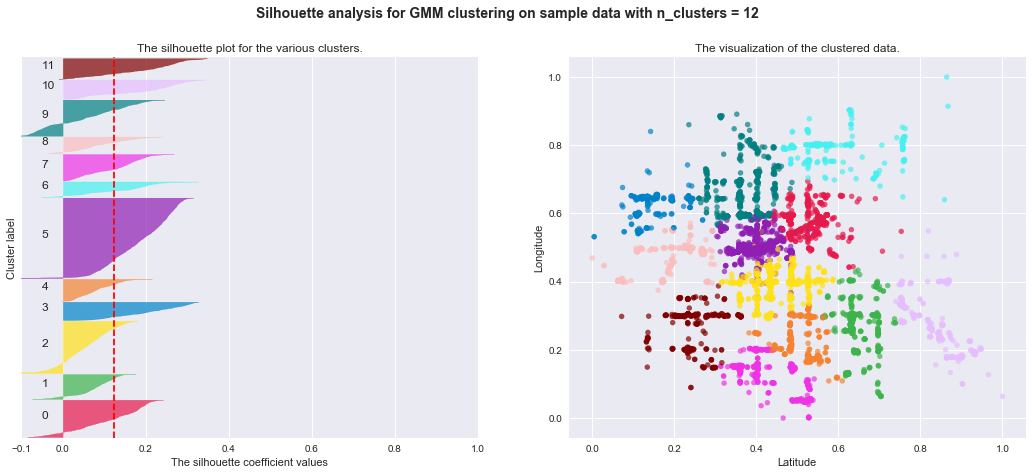

In [11]:
data_gmm = df_pca_names.copy()
data_gmm["latitude"] *= 2
data_gmm["longitude"] *= 2
silhouette_analysis(data_gmm, 12,"GMM")


## Agrupamento Espectral - 11 grupos

[carne         0.001321
going         0.001290
sweet         0.001253
tacos         0.001250
mall          0.001152
catfish       0.001110
her           0.001011
every         0.000993
meadows       0.000917
closed        0.000794
charleston    0.000775
wings         0.000765
peruvian      0.000743
looks         0.000712
family        0.000704
week          0.000683
chili         0.000683
lemonade      0.000669
has           0.000649
dtype: float64, truck           0.002234
circus          0.002119
fremont         0.001784
street          0.001752
rib             0.001523
hotel           0.001462
las             0.001189
stratosphere    0.001087
old             0.001062
prime           0.001007
casino          0.000901
recommend       0.000868
mexican         0.000844
99              0.000828
el              0.000818
pupusas         0.000785
plaza           0.000739
diner           0.000721
park            0.000720
dtype: float64, chinese       0.004464
pho           0.004258
pork     

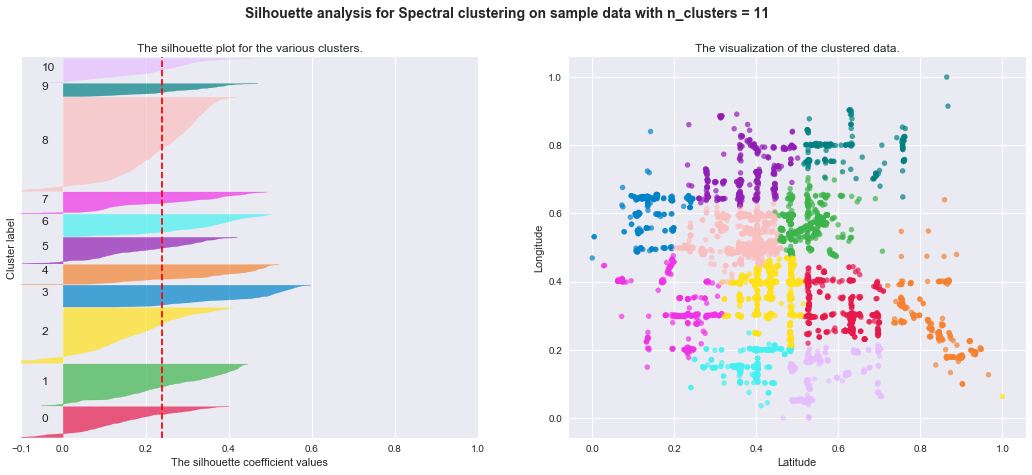

In [12]:
data_spectral = df_pca_names.copy()
data_spectral["latitude"] *= 3.5
data_spectral["longitude"] *= 3.5
silhouette_analysis(data_spectral, 11,"Spectral")


# Parte 2 - Letra C

Na Parte I, descobrimos que o número ideal de grupos está situado entre 10 e 15, com base nisso rodamos os algoritmos dentre este intervalo com os pesos de latitude e longitude também definidos anteriormente e escolhemos o valor que apresentasse melhor coeficiente de silhueta, já que, visualmente, os resultados encontrados são igualmente satisfatórios

# Parte 2 - Letra D


# Parte 2 - Letra E

Definimos como rótulo das categorias nesta parte os 20 termos de maior importância para um grupo, esse grau de importância de um termo é dado pela subtração das médias da pontuação TF-IDF dos restaurantes pertencentes ao grupo pelos restaurantes não pertencentes ao grupo, como dito nos comentários da função `silhouette_analysis`.

Com esse método, esperamos que no rótulo apareçam termos que se relacionem com a temática dos restaurantes, a comida oferecida, os ingredientes ou pontos de referência, como, por exemplo, "mexican, taco, pizza, drive, thru, sushi, unlv (University of Nevada, Las Vegas)"